# Pre-processing
## Agrotech Project
**Rigoberto Valadez Mena - 2100374**
### Imports and Library Loading

In [41]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler

### Importing the Plants sheet
We first import the data and read the first sheet, called 'plants'. We print the head to make sure everything was loaded correctly.

In [2]:
plantsSheet = pd.read_excel('Data.xlsx', sheet_name='plants')
plantsSheet.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN


The name of the columns are too long to work with, we will change them to shorter names using Cammel Case

In [3]:
df = plantsSheet.copy()
df.rename(columns={'Batch Number': 'batchNumber', 'Plant Date': 'plantDate', 'Class': 'class', 'Fresh Weight (g)': 'freshWeight', 'Head Weight (g)': 'headWeight', 'Radial Diameter (mm)': 'radialDiameter', 'Polar Diameter (mm)': 'polarDiameter', 'Diameter Ratio': 'diameterRatio', 'Leaves': 'leaves', 'Density (kg/L)': 'density', 'Leaf Area (cm^2)': 'leafArea', 'Square ID': 'squareId', 'Check Date': 'checkDate', 'Flight Date': 'flightDate', 'Remove': 'remove'}, inplace=True)
df.head()

,batchNumber,plantDate,class,freshWeight,headWeight,radialDiameter,polarDiameter,diameterRatio,leaves,density,leafArea,squareId,checkDate,flightDate,remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN


We see that there are some columns with null values, which are:
- Plant Date
- Fresh Weight
- Head Weight
- Radial Diameter
- Polar Diameter
- Diameter Ratio
- Leaves
- Density
- Leaf Area
- Flight Date
- Remove

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   batchNumber     4859 non-null   int64         
 1   plantDate       4685 non-null   datetime64[ns]
 2   class           4859 non-null   int64         
 3   freshWeight     4858 non-null   float64       
 4   headWeight      4754 non-null   float64       
 5   radialDiameter  4754 non-null   float64       
 6   polarDiameter   4754 non-null   float64       
 7   diameterRatio   4752 non-null   float64       
 8   leaves          100 non-null    float64       
 9   density         4672 non-null   float64       
 10  leafArea        4857 non-null   float64       
 11  squareId        4859 non-null   int64         
 12  checkDate       4859 non-null   datetime64[ns]
 13  flightDate      472 non-null    datetime64[ns]
 14  remove          70 non-null     object        
dtypes: d

The description of the project specified that we should remove all the rows which had an ***r*** on the column 'remove'. We remove these rows and drop the column after that.

In [5]:
df = df[df.remove != 'r']
df.drop('remove', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4789 entries, 0 to 4858
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   batchNumber     4789 non-null   int64         
 1   plantDate       4615 non-null   datetime64[ns]
 2   class           4789 non-null   int64         
 3   freshWeight     4788 non-null   float64       
 4   headWeight      4684 non-null   float64       
 5   radialDiameter  4684 non-null   float64       
 6   polarDiameter   4684 non-null   float64       
 7   diameterRatio   4682 non-null   float64       
 8   leaves          100 non-null    float64       
 9   density         4602 non-null   float64       
 10  leafArea        4787 non-null   float64       
 11  squareId        4789 non-null   int64         
 12  checkDate       4789 non-null   datetime64[ns]
 13  flightDate      468 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(8), int64(3)
memory usage:

### Importing the Flight Dates sheet
We now will import the second sheet in the document. We print the head to make sure it was loaded correctly.

In [6]:
flightDatesSheet = pd.read_excel('Data.xlsx', sheet_name='flight dates')
flightDatesSheet.head()

,Batch Number,Flight Date
0,402,2020-04-30
1,408,2020-04-30
2,409,2020-04-30
3,466,2020-07-01
4,467,2020-07-01


We rename the columns to make sure it matches with our main DataFrame

In [7]:
flightDatesSheet.rename(columns={'Batch Number': 'batchNumber', 'Flight Date': 'flightDate'}, inplace=True)
flightDatesSheet.head()

,batchNumber,flightDate
0,402,2020-04-30
1,408,2020-04-30
2,409,2020-04-30
3,466,2020-07-01
4,467,2020-07-01


We look for Null values and make sure the data has the correct type. We notice there are no Null values

In [8]:
flightDatesSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   batchNumber  50 non-null     int64         
 1   flightDate   50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 928.0 bytes


We merge this sheet with the main DataFrame to fill in the missing Flight Dates.

In [9]:
df = df.merge(flightDatesSheet, how='inner', on='batchNumber')
df.head()

,batchNumber,plantDate,class,freshWeight,headWeight,radialDiameter,polarDiameter,diameterRatio,leaves,density,leafArea,squareId,checkDate,flightDate_x,flightDate_y
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,2020-04-30
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,2020-04-30
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,2020-04-30
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,2020-04-30
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,2020-04-30


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3333
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   batchNumber     3334 non-null   int64         
 1   plantDate       3294 non-null   datetime64[ns]
 2   class           3334 non-null   int64         
 3   freshWeight     3333 non-null   float64       
 4   headWeight      3236 non-null   float64       
 5   radialDiameter  3236 non-null   float64       
 6   polarDiameter   3236 non-null   float64       
 7   diameterRatio   3235 non-null   float64       
 8   leaves          95 non-null     float64       
 9   density         3235 non-null   float64       
 10  leafArea        3333 non-null   float64       
 11  squareId        3334 non-null   int64         
 12  checkDate       3334 non-null   datetime64[ns]
 13  flightDate_x    468 non-null    datetime64[ns]
 14  flightDate_y    3334 non-null   datetime64[ns]
dtypes: d

We observe that the column *flightDate_y* was the one with has the complete information, we drop the *flightDate_x* column and rename the complete column to *flightDate*.

In [11]:
df.drop('flightDate_x', axis=1, inplace=True)
df.rename(columns={'flightDate_y': 'flightDate'}, inplace=True)
df.head()

,batchNumber,plantDate,class,freshWeight,headWeight,radialDiameter,polarDiameter,diameterRatio,leaves,density,leafArea,squareId,checkDate,flightDate
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,2020-04-30
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,2020-04-30
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,2020-04-30
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,2020-04-30
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,2020-04-30


### Importing the Planting sheet
We then load the Planting sheet and print it's head to make sure the data was loaded correctly

In [12]:
plantingSheet = pd.read_excel('Data.xlsx', sheet_name='planting')
plantingSheet.head()

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3,NaN,NaN,2020-02-06 00:00:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,2020-02-08 00:00:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,2020-02-10 00:00:00,NaN,0.0,NaN,770,13944.0,7.0


In [13]:
plantingSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Crop            1953 non-null   object 
 1   Column2         0 non-null      float64
 2   Column3         0 non-null      float64
 3   Plant_Date      1953 non-null   object 
 4   Column1         0 non-null      float64
 5   Region          1953 non-null   float64
 6   Column4         0 non-null      float64
 7   Planting_Batch  1822 non-null   object 
 8   Volume_Planted  1821 non-null   float64
 9   Planting_Wk     1953 non-null   float64
dtypes: float64(7), object(3)
memory usage: 185.5+ KB


We remove unnecessary columns that have no information.

In [14]:
plantingSheet.drop(['Column2', 'Column3', 'Column1', 'Column4'], axis=1, inplace=True)
plantingSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Crop            1953 non-null   object 
 1   Plant_Date      1953 non-null   object 
 2   Region          1953 non-null   float64
 3   Planting_Batch  1822 non-null   object 
 4   Volume_Planted  1821 non-null   float64
 5   Planting_Wk     1953 non-null   float64
dtypes: float64(3), object(3)
memory usage: 111.4+ KB


We were told by the data provider that all the contents from row 1822 should be removed, as it was not matching the data format used in the previous rows.

In [15]:
plantingSheet = plantingSheet.loc[:1820,:]
plantingSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Crop            1821 non-null   object 
 1   Plant_Date      1821 non-null   object 
 2   Region          1821 non-null   float64
 3   Planting_Batch  1821 non-null   object 
 4   Volume_Planted  1821 non-null   float64
 5   Planting_Wk     1821 non-null   float64
dtypes: float64(3), object(3)
memory usage: 85.5+ KB


After removing the unwanted data we cast the types of data accordingly.

In [16]:
plantingSheet = plantingSheet.astype({'Crop': 'int32', 'Planting_Batch': 'int32', 'Region': 'int32', 'Planting_Wk': 'int32'})
plantingSheet['Plant_Date'] = pd.to_datetime(plantingSheet['Plant_Date'])
plantingSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Crop            1821 non-null   int32         
 1   Plant_Date      1821 non-null   datetime64[ns]
 2   Region          1821 non-null   int32         
 3   Planting_Batch  1821 non-null   int32         
 4   Volume_Planted  1821 non-null   float64       
 5   Planting_Wk     1821 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 57.0 KB


We rename the columns to match the main DataFrame.

In [17]:
plantingSheet.rename(columns={'Planting_Batch': 'batchNumber', 'Plant_Date': 'plantDate', 'Crop': 'crop', 'Region': 'region', 'Volume_Planted': 'volumePlanted', 'Planting_Wk': 'plantingWeek'}, inplace=True)
plantingSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   crop           1821 non-null   int32         
 1   plantDate      1821 non-null   datetime64[ns]
 2   region         1821 non-null   int32         
 3   batchNumber    1821 non-null   int32         
 4   volumePlanted  1821 non-null   float64       
 5   plantingWeek   1821 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 57.0 KB


We merge the Planting data sheet with the main DataFrame.

In [18]:
df = df.merge(plantingSheet, how='inner', on='batchNumber')
df.head()

,batchNumber,plantDate_x,class,freshWeight,headWeight,radialDiameter,polarDiameter,diameterRatio,leaves,density,leafArea,squareId,checkDate,flightDate,crop,plantDate_y,region,volumePlanted,plantingWeek
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,2020-04-30,3,2020-04-11,0,155232.0,15
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,2020-04-30,3,2020-04-11,0,155232.0,15
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,2020-04-30,3,2020-04-11,0,155232.0,15
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,2020-04-30,3,2020-04-11,0,155232.0,15
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,2020-04-30,3,2020-04-11,0,155232.0,15


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3333
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   batchNumber     3334 non-null   int64         
 1   plantDate_x     3294 non-null   datetime64[ns]
 2   class           3334 non-null   int64         
 3   freshWeight     3333 non-null   float64       
 4   headWeight      3236 non-null   float64       
 5   radialDiameter  3236 non-null   float64       
 6   polarDiameter   3236 non-null   float64       
 7   diameterRatio   3235 non-null   float64       
 8   leaves          95 non-null     float64       
 9   density         3235 non-null   float64       
 10  leafArea        3333 non-null   float64       
 11  squareId        3334 non-null   int64         
 12  checkDate       3334 non-null   datetime64[ns]
 13  flightDate      3334 non-null   datetime64[ns]
 14  crop            3334 non-null   int32         
 15  plan

With this merge we get the data for the missing values in the *plantDate* column, we determine the column with the complete information and remove the incomplete column.

In [20]:
df.drop('plantDate_x', axis=1, inplace=True)
df.rename(columns={'plantDate_y': 'plantDate'}, inplace=True)
df.head()

,batchNumber,class,freshWeight,headWeight,radialDiameter,polarDiameter,diameterRatio,leaves,density,leafArea,squareId,checkDate,flightDate,crop,plantDate,region,volumePlanted,plantingWeek
0,402,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,2020-04-30,3,2020-04-11,0,155232.0,15
1,402,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,2020-04-30,3,2020-04-11,0,155232.0,15
2,402,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,2020-04-30,3,2020-04-11,0,155232.0,15
3,402,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,2020-04-30,3,2020-04-11,0,155232.0,15
4,402,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,2020-04-30,3,2020-04-11,0,155232.0,15


### Importing the Weather sheet
We read the weather sheet and print it's head to make sure the data was imported correctly.

In [21]:
weatherSheet = pd.read_excel('Data.xlsx', sheet_name='weather')
weatherSheet.head()

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2


We rename the columns to shorter names.

In [22]:
weatherSheet.rename(columns={'Unnamed: 0': 'date', 'Solar Radiation [avg]': 'meanSolarRadiation', 'Precipitation [sum]': 'totalPrecipitation', 'Wind Speed [avg]': 'meanWindSpeed', 'Wind Speed [max]': 'maxWindSpeed', 'Battery Voltage [last]': 'batteryVoltage', 'Leaf Wetness [time]': 'leafWetness', 'Air Temperature [avg]': 'meanAirTemp', 'Air Temperature [max]': 'maxAirTemp', 'Air Temperature [min]': 'minAirTemp', 'Relative Humidity [avg]': 'humidity', 'Dew Point [avg]': 'meanDewPoint', 'Dew Point [min]': 'minDewPoint', 'ET0 [result]': 'eto'}, inplace=True)
weatherSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2556 non-null   datetime64[ns]
 1   meanSolarRadiation  2556 non-null   int64         
 2   totalPrecipitation  2556 non-null   float64       
 3   meanWindSpeed       2556 non-null   float64       
 4   maxWindSpeed        2556 non-null   float64       
 5   batteryVoltage      2556 non-null   int64         
 6   leafWetness         2556 non-null   int64         
 7   meanAirTemp         2556 non-null   float64       
 8   maxAirTemp          2556 non-null   float64       
 9   minAirTemp          2556 non-null   float64       
 10  humidity            2556 non-null   float64       
 11  meanDewPoint        2553 non-null   float64       
 12  minDewPoint         2510 non-null   float64       
 13  eto                 2490 non-null   float64     

There are a few missing values in the columns:
- MeanDewPoint
- MinDewPoint
- Eto

We fill the missing values with the mean of the whole column

In [23]:
values = {'meanDewPoint': weatherSheet['meanDewPoint'].mean(), 'minDewPoint': weatherSheet['minDewPoint'].mean(), 'eto': weatherSheet['eto'].mean()}
weatherSheet.fillna(value=values, inplace=True)
weatherSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2556 non-null   datetime64[ns]
 1   meanSolarRadiation  2556 non-null   int64         
 2   totalPrecipitation  2556 non-null   float64       
 3   meanWindSpeed       2556 non-null   float64       
 4   maxWindSpeed        2556 non-null   float64       
 5   batteryVoltage      2556 non-null   int64         
 6   leafWetness         2556 non-null   int64         
 7   meanAirTemp         2556 non-null   float64       
 8   maxAirTemp          2556 non-null   float64       
 9   minAirTemp          2556 non-null   float64       
 10  humidity            2556 non-null   float64       
 11  meanDewPoint        2556 non-null   float64       
 12  minDewPoint         2556 non-null   float64       
 13  eto                 2556 non-null   float64     

We created this function which gets the main weather features given two dates. For values that are means we get means, for total amouns we get sums, for maximums and minimums we get both accordingly.

In [24]:
def getWeatherInfo(date1, date2):
    weatherData = weatherSheet.where(weatherSheet['date'] <= date2)
    weatherData = weatherData.where(weatherData['date'] >= date1)
    myDict = {'meanSolarRadiation': weatherData['meanSolarRadiation'].mean(), 'totalPrecipitation': weatherData['totalPrecipitation'].sum(), 'meanWindSpeed': weatherData['meanWindSpeed'].mean(), 'maxWindSpeed': weatherData['maxWindSpeed'].max(), 'batteryVoltage': weatherData['batteryVoltage'].mean(), 'leafWetness': weatherData['leafWetness'].sum(), 'meanAirTemp': weatherData['meanAirTemp'].mean(), 'maxAirTemp': weatherData['maxAirTemp'].max(), 'minAirTemp': weatherData['minAirTemp'].min(), 'humidity': weatherData['humidity'].mean(), 'meanDewPoint': weatherData['meanDewPoint'].mean(), 'minDewPoint': weatherData['minDewPoint'].mean(), 'eto': weatherData['eto'].sum()}
    ser = pd.Series(data=myDict, index=['meanSolarRadiation', 'totalPrecipitation', 'meanWindSpeed', 'maxWindSpeed', 'batteryVoltage', 'leafWetness', 'meanAirTemp', 'maxAirTemp', 'minAirTemp', 'humidity', 'meanDewPoint', 'minDewPoint', 'eto'])
    return ser


We verify the function is working correctly.

In [25]:
date1 = df.loc[0,'plantDate']
date2 = df.loc[0, 'flightDate']
getWeatherInfo(date1, date2)

meanSolarRadiation     235.9500
totalPrecipitation      19.6000
meanWindSpeed            2.8050
maxWindSpeed             9.8000
batteryVoltage        6886.0000
leafWetness           1035.0000
meanAirTemp             10.4860
maxAirTemp              24.4500
minAirTemp               0.2900
humidity                74.4195
meanDewPoint             5.2100
minDewPoint              2.1400
eto                     62.2000
dtype: float64

We created this function to get the weather features from 1 year ago given two present dates. This will help us to estimate the weather for future dates

In [26]:
def getWeatherInfoPreviousYear(date1, date2):
    weatherData = weatherSheet.where(weatherSheet['date'] <= (date2 - np.timedelta64(365,'D')))
    weatherData = weatherData.where(weatherData['date'] >= (date1 - np.timedelta64(365,'D')))
    myDict = {'meanSolarRadiation': weatherData['meanSolarRadiation'].mean(), 'totalPrecipitation': weatherData['totalPrecipitation'].sum(), 'meanWindSpeed': weatherData['meanWindSpeed'].mean(), 'maxWindSpeed': weatherData['maxWindSpeed'].max(), 'batteryVoltage': weatherData['batteryVoltage'].mean(), 'leafWetness': weatherData['leafWetness'].sum(), 'meanAirTemp': weatherData['meanAirTemp'].mean(), 'maxAirTemp': weatherData['maxAirTemp'].max(), 'minAirTemp': weatherData['minAirTemp'].min(), 'humidity': weatherData['humidity'].mean(), 'meanDewPoint': weatherData['meanDewPoint'].mean(), 'minDewPoint': weatherData['minDewPoint'].mean(), 'eto': weatherData['eto'].sum()}
    ser = pd.Series(data=myDict, index=['meanSolarRadiation', 'totalPrecipitation', 'meanWindSpeed', 'maxWindSpeed', 'batteryVoltage', 'leafWetness', 'meanAirTemp', 'maxAirTemp', 'minAirTemp', 'humidity', 'meanDewPoint', 'minDewPoint', 'eto'])
    return ser


We verify the function is working correctly.

In [27]:
date1 = df.loc[0,'plantDate']
date2 = df.loc[0, 'flightDate']
getWeatherInfoPreviousYear(date1, date2)

meanSolarRadiation     147.950000
totalPrecipitation       0.800000
meanWindSpeed            2.615000
maxWindSpeed            11.300000
batteryVoltage        6736.900000
leafWetness            960.000000
meanAirTemp             10.026500
maxAirTemp              24.720000
minAirTemp              -1.580000
humidity                79.813000
meanDewPoint             5.870000
minDewPoint              2.314139
eto                     49.200000
dtype: float64

In [28]:
dates = df.loc[:,['plantDate', 'flightDate']]
dates.head()

,plantDate,flightDate
0,2020-04-11,2020-04-30
1,2020-04-11,2020-04-30
2,2020-04-11,2020-04-30
3,2020-04-11,2020-04-30
4,2020-04-11,2020-04-30


In [29]:
data = []
for index, row in dates.iterrows():
    data.append(getWeatherInfo(row.iloc[0], row.iloc[1]))
data = pd.DataFrame(data)
data.head()

,meanSolarRadiation,totalPrecipitation,meanWindSpeed,maxWindSpeed,batteryVoltage,leafWetness,meanAirTemp,maxAirTemp,minAirTemp,humidity,meanDewPoint,minDewPoint,eto
0,235.95,19.6,2.805,9.8,6886.0,1035.0,10.486,24.45,0.29,74.4195,5.21,2.14,62.2
1,235.95,19.6,2.805,9.8,6886.0,1035.0,10.486,24.45,0.29,74.4195,5.21,2.14,62.2
2,235.95,19.6,2.805,9.8,6886.0,1035.0,10.486,24.45,0.29,74.4195,5.21,2.14,62.2
3,235.95,19.6,2.805,9.8,6886.0,1035.0,10.486,24.45,0.29,74.4195,5.21,2.14,62.2
4,235.95,19.6,2.805,9.8,6886.0,1035.0,10.486,24.45,0.29,74.4195,5.21,2.14,62.2


In [30]:
df = pd.concat([df, data], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3333
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   batchNumber         3334 non-null   int64         
 1   class               3334 non-null   int64         
 2   freshWeight         3333 non-null   float64       
 3   headWeight          3236 non-null   float64       
 4   radialDiameter      3236 non-null   float64       
 5   polarDiameter       3236 non-null   float64       
 6   diameterRatio       3235 non-null   float64       
 7   leaves              95 non-null     float64       
 8   density             3235 non-null   float64       
 9   leafArea            3333 non-null   float64       
 10  squareId            3334 non-null   int64         
 11  checkDate           3334 non-null   datetime64[ns]
 12  flightDate          3334 non-null   datetime64[ns]
 13  crop                3334 non-null   int32       

In [31]:
df.drop(['batchNumber', 'checkDate', 'plantDate', 'flightDate', 'leaves', 'diameterRatio', 'density', 'squareId'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3333
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class               3334 non-null   int64  
 1   freshWeight         3333 non-null   float64
 2   headWeight          3236 non-null   float64
 3   radialDiameter      3236 non-null   float64
 4   polarDiameter       3236 non-null   float64
 5   leafArea            3333 non-null   float64
 6   crop                3334 non-null   int32  
 7   region              3334 non-null   int32  
 8   volumePlanted       3334 non-null   float64
 9   plantingWeek        3334 non-null   int32  
 10  meanSolarRadiation  3334 non-null   float64
 11  totalPrecipitation  3334 non-null   float64
 12  meanWindSpeed       3334 non-null   float64
 13  maxWindSpeed        3334 non-null   float64
 14  batteryVoltage      3334 non-null   float64
 15  leafWetness         3334 non-null   float64
 16  meanAi

In [33]:
df.dropna(subset=['headWeight', 'polarDiameter', 'radialDiameter'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3236 entries, 25 to 3333
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class               3236 non-null   int64  
 1   freshWeight         3236 non-null   float64
 2   headWeight          3236 non-null   float64
 3   radialDiameter      3236 non-null   float64
 4   polarDiameter       3236 non-null   float64
 5   leafArea            3236 non-null   float64
 6   crop                3236 non-null   int32  
 7   region              3236 non-null   int32  
 8   volumePlanted       3236 non-null   float64
 9   plantingWeek        3236 non-null   int32  
 10  meanSolarRadiation  3236 non-null   float64
 11  totalPrecipitation  3236 non-null   float64
 12  meanWindSpeed       3236 non-null   float64
 13  maxWindSpeed        3236 non-null   float64
 14  batteryVoltage      3236 non-null   float64
 15  leafWetness         3236 non-null   float64
 16  meanA

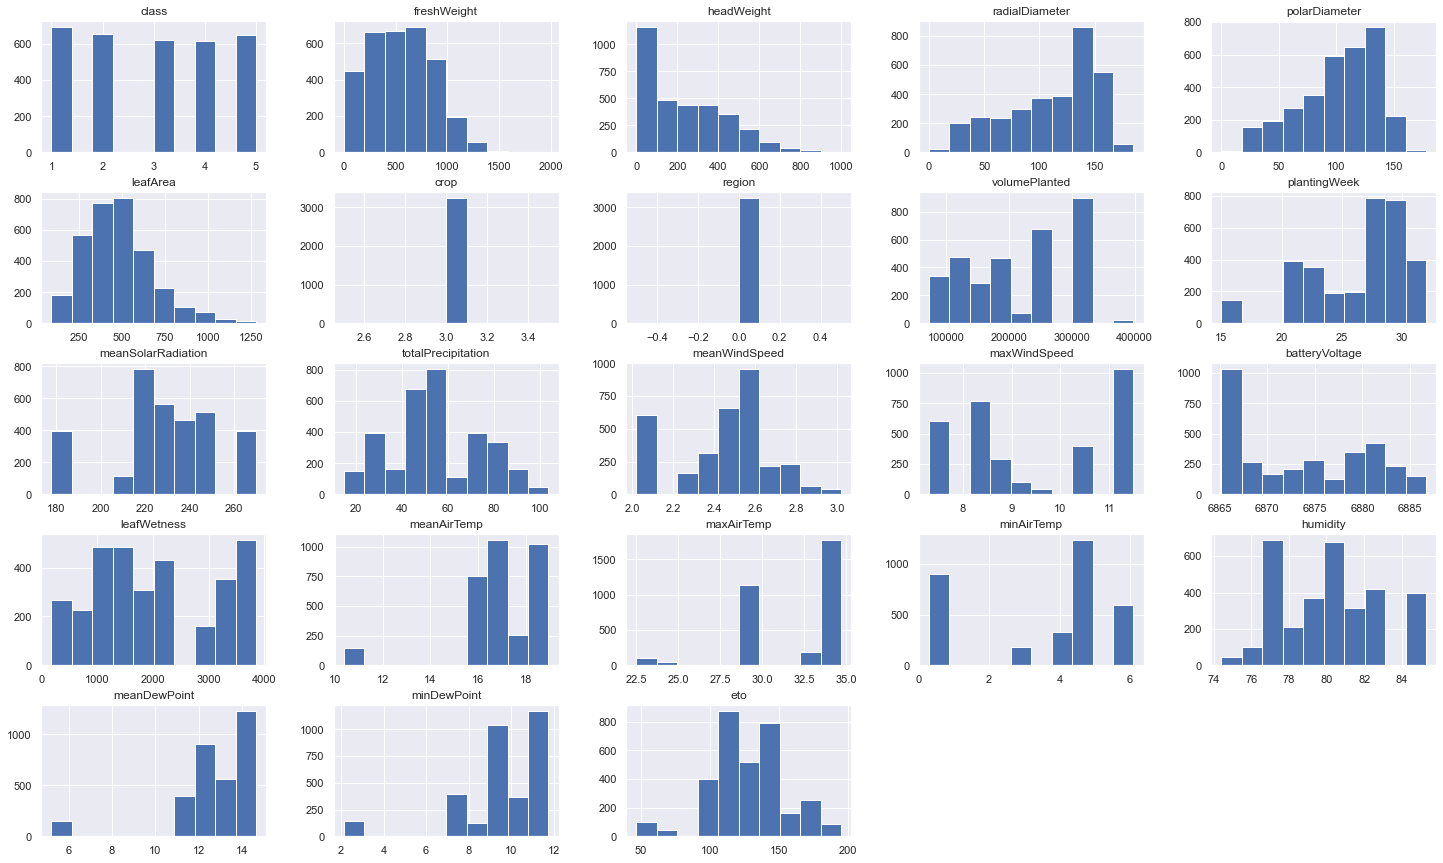

In [50]:
df.hist(figsize=(25,15))
plt.show()

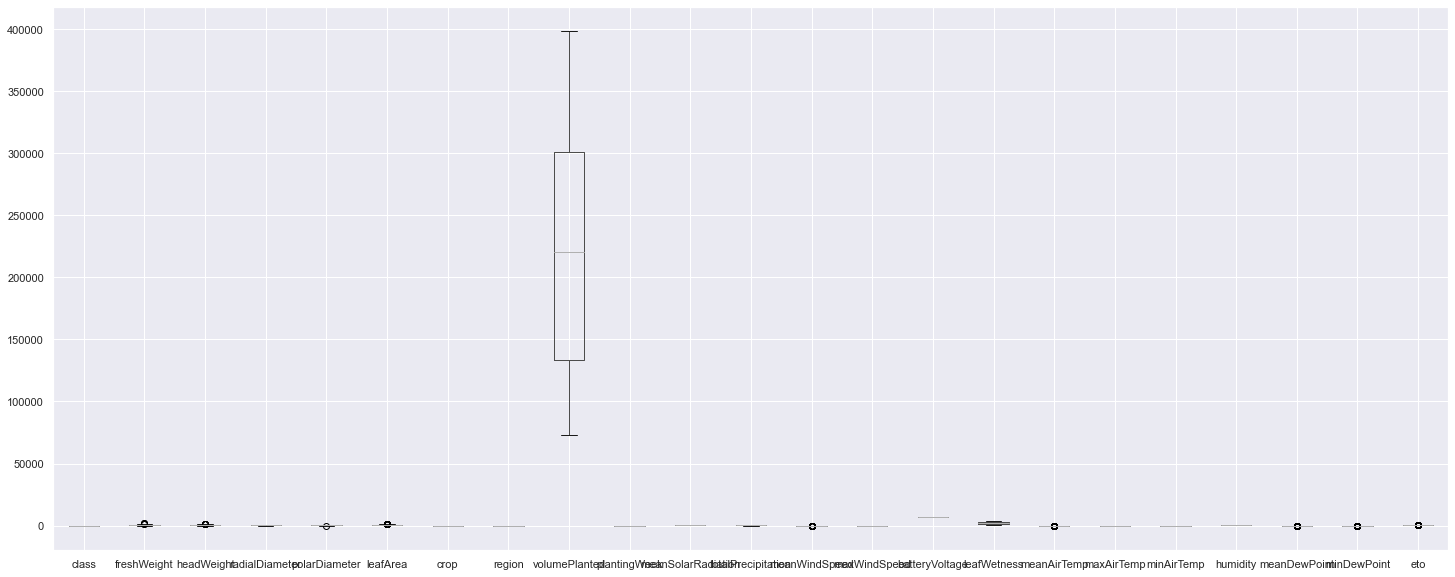

In [51]:
df.boxplot()
plt.show()

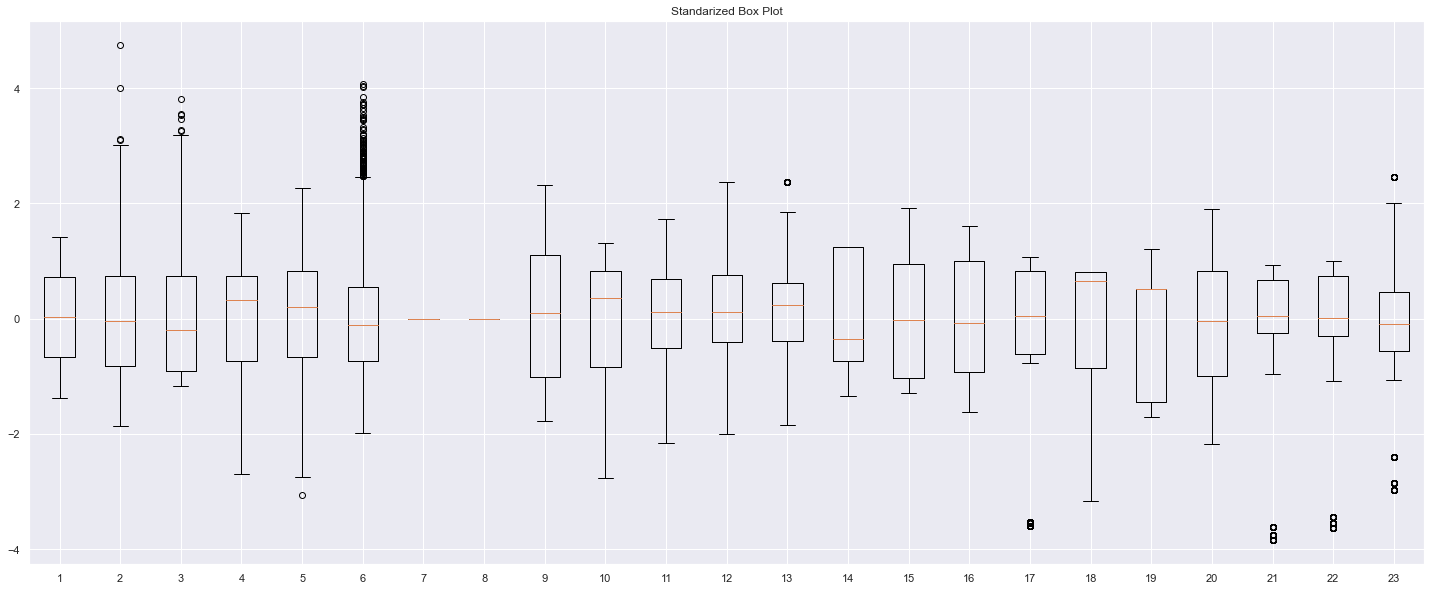

In [52]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(df)
plt.boxplot(scaledData)
plt.title('Standarized Box Plot')
plt.show()

<AxesSubplot:>

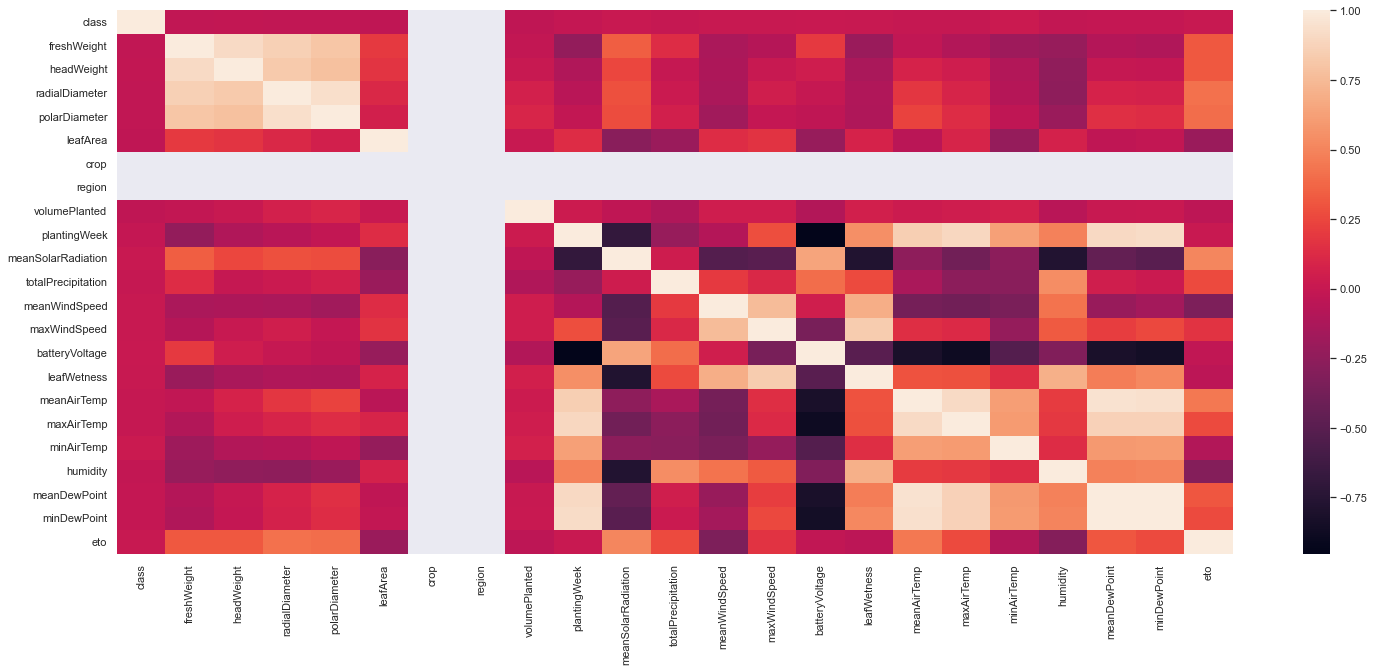

In [54]:
sns.set(rc = {'figure.figsize':(25,10)})
sns.heatmap(df.corr())